# **Proyek Machine Learning Prediksi Harga Rumah - California House Prices**


---



**Mellania Permata Sylvie**

**Submission 1 - Machine Learning Terapan**

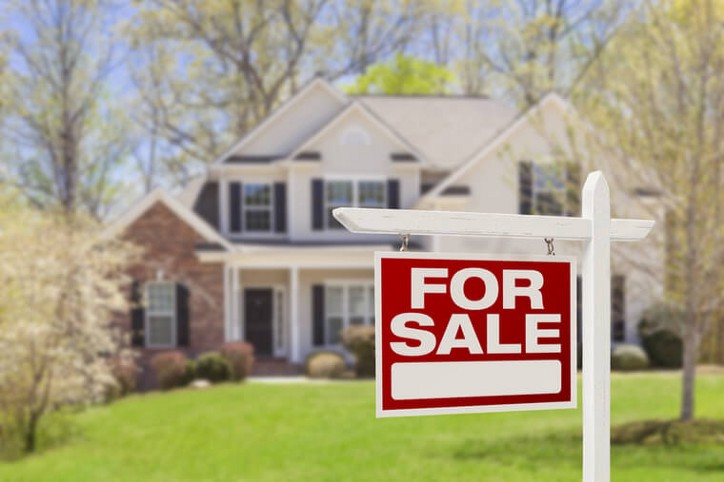

## **Pendahuluan**

Proyek ini merupakan proyek machine learning untuk memprediksi harga rumah. Proyek ini berfokus pada domain Ekonomi dan Bisnis. Dengan memanfaatkan data yang ada, peneliti menerapkan model regresi untuk memprediksi berapakah harga rumah di masa yang akan datang. Dengan mengetahui prediksi harga rumah, pembeli dapat mendapatkan harga yang bagus dan investor juga dapat memprediksi potensi pengembalian investasi mereka.

## **1. Data Loading**

Tahap ini merupakan tahapan mengakses data, seperti menyiapkan library dan akses terhadap datasetnya.

**1.1. Mengimpor Library yang Dibutuhkan**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


**1.2. Menghubungkan Google Colab dengan G-Drive**

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**1.3. Mengakses Dataset (Load Dataset)**

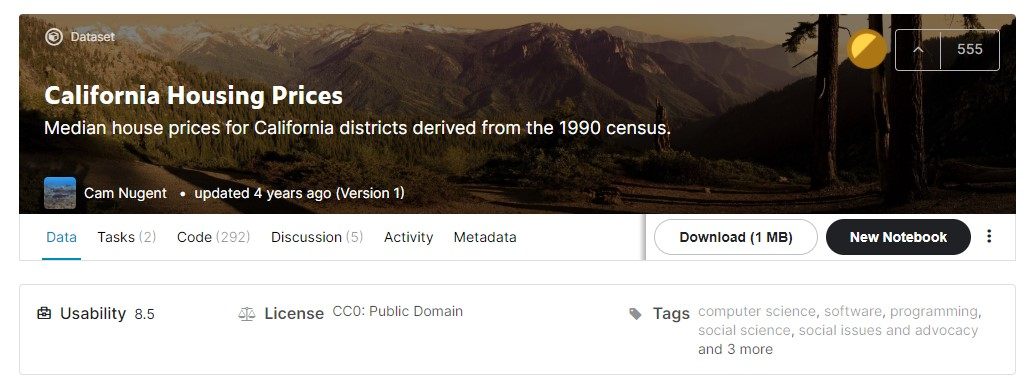

Dataset yang akan digunakan yaitu California Housing Prices. Datasetnya bisa diunduh di [Kaggle Dataset : California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices)

In [3]:
#Membaca dataset dengan library pandas
data_rumah = pd.read_csv("/content/drive/MyDrive/Dataset/housing.csv")
data_rumah

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## **2. Exploratory Data Analysis (EDA)**

Tahap ini merupakan tahapan untuk menganalisa data. Teknik yang digunakan yaitu Exploratory Data Analysis (EDA)

### **2.1. Deskripsi Variabel**

**2.1.1. Melihat informasi dataset**

In [4]:
data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**2.1.2. Melihat Deskripsi Statistik Dataset**

In [5]:
data_rumah.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **2.2. Menangani Missing Values**

**2.2.1. Mengecek Missing Values Pada Dataset dengan fungsi isnull()**

In [6]:
data_rumah.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**2.2.2. Menghilangkan Missing Values dengan Fungsi Dropna()**

In [7]:
data_rumah = data_rumah.dropna()

**2.2.3. Mengecek Kembali Missing Values Pada Data**

In [8]:
data_rumah.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**2.2.4. Melihat Ukuran Data Setelah Menghilangkan Missing Values**

In [9]:
data_rumah.shape

(20433, 10)

### **2.3. Menangani Outliers**

**2.3.1. Mendeteksi Outliers Pada Fitur longitude**

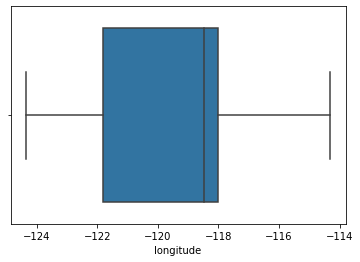

In [10]:
sns.boxplot(x=data_rumah['longitude'])

**2.3.2. Mendeteksi Outliers Pada Fitur latitude**

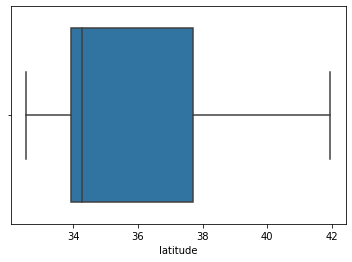

In [11]:
sns.boxplot(x=data_rumah['latitude'])

**2.3.3. Mendeteksi Outliers Pada Fitur housing_median_age**

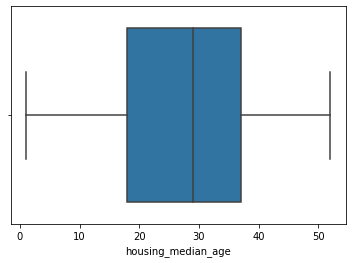

In [12]:
sns.boxplot(x=data_rumah['housing_median_age'])

**2.3.4. Mendeteksi Outliers Pada Fitur total_rooms**

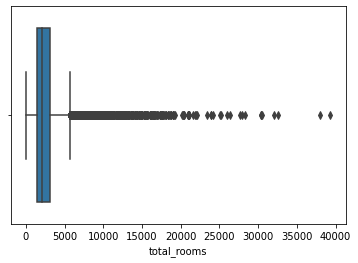

In [13]:
sns.boxplot(x=data_rumah['total_rooms'])

**2.3.5. Mendeteksi Outliers Pada Fitur total_bedrooms**

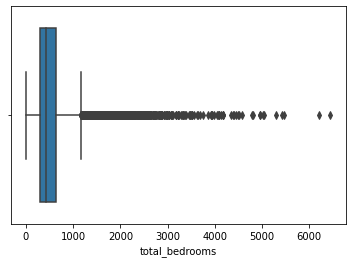

In [14]:
sns.boxplot(x=data_rumah['total_bedrooms'])

**2.3.6. Mendeteksi Outliers Pada Fitur population**

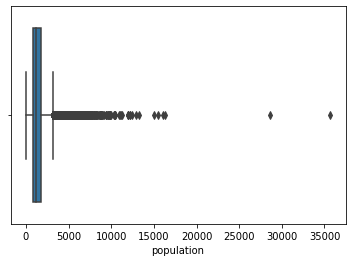

In [15]:
sns.boxplot(x=data_rumah['population'])

**2.3.7. Mendeteksi Outliers Pada Fitur households**

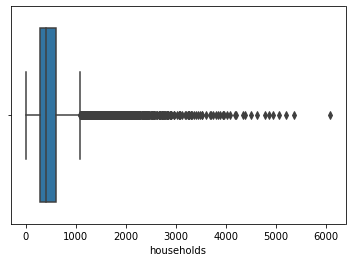

In [16]:
sns.boxplot(x=data_rumah['households'])

**2.3.8. Mendeteksi Outliers Pada Fitur median_income**

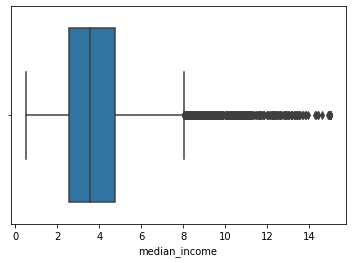

In [17]:
sns.boxplot(x=data_rumah['median_income'])

**2.3.9. Mendeteksi Outliers Pada Fitur median_house_value**

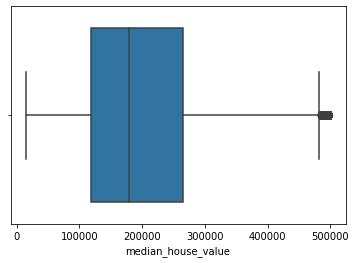

In [18]:
sns.boxplot(x=data_rumah['median_house_value'])

**2.3.10. Menghilangkan Outliers dengan Metode IQR**

In [19]:
Q1 = data_rumah.quantile(0.25)
Q3 = data_rumah.quantile(0.75)
IQR = Q3-Q1
data_rumah=data_rumah[~((data_rumah<(Q1-1.5*IQR))|(data_rumah>(Q3+1.5*IQR))).any(axis=1)]
 
#Mengecek ukuran dataset setelah menghilangkan outliers
data_rumah.shape

(17434, 10)

### **2.4. Univariate Analysis**

**2.4.1. Membagi fitur dataset menjadi 2, yaitu categorical dan numerical**

In [20]:
categorical_features = ['ocean_proximity']
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']


**2.4.2. Analisa Fitur Categorical yaitu ocean_proximity**

            jumlah sampel  persentase
<1H OCEAN            7523       43.15
INLAND               5817       33.37
NEAR OCEAN           2204       12.64
NEAR BAY             1885       10.81
ISLAND                  5        0.03


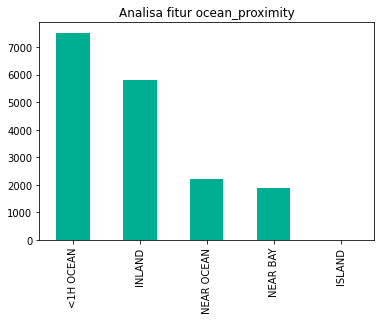

In [21]:
fitur = categorical_features[0]
jumlah = data_rumah[fitur].value_counts()
persentase = 100*data_rumah[fitur].value_counts(normalize=True)
fitur_ocean = pd.DataFrame({'jumlah sampel':jumlah, 'persentase':persentase.round(2)})
print(fitur_ocean)
jumlah.plot(kind='bar', color = '#00af91', title='Analisa fitur '+fitur);

**2.4.3. Analisa Fitur Numerical**

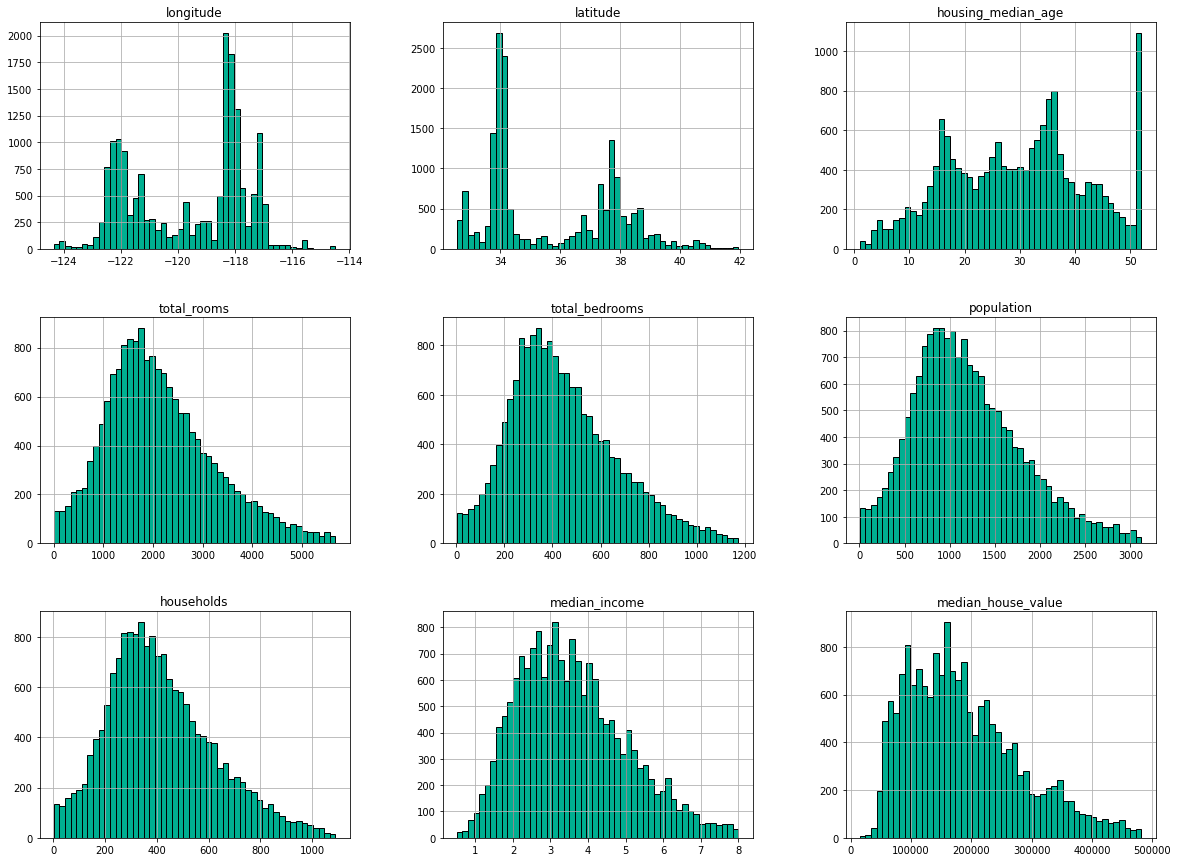

In [22]:
data_rumah.hist(bins=50, figsize=(20,15), ec = 'black', color = '#00af91')
plt.show()

### **2.5. Multivariate Analysis**

**2.5.1 Analisa pengaruh fitur categorical terhadap harga rumah (median_house_value)**

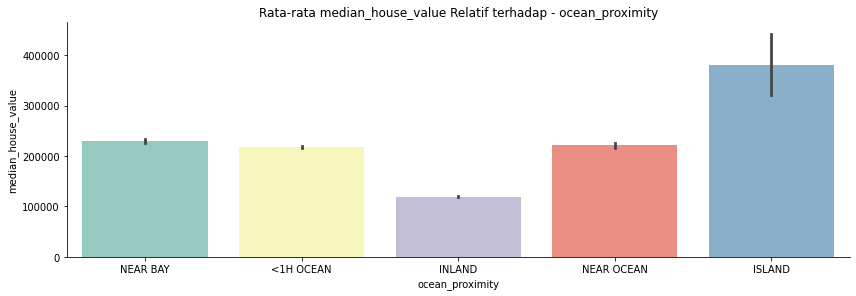

In [23]:
ocean_features = data_rumah.select_dtypes(include='object').columns.to_list()
 
for ocean in ocean_features:
  sns.catplot(x=ocean, y="median_house_value", kind="bar", dodge=False, height = 4, aspect = 3,  data=data_rumah, palette="Set3")
  plt.title("Rata-rata median_house_value Relatif terhadap - {}".format(ocean))

**2.5.2. Analisa korelasi fitur latitude, longitude, dan population**

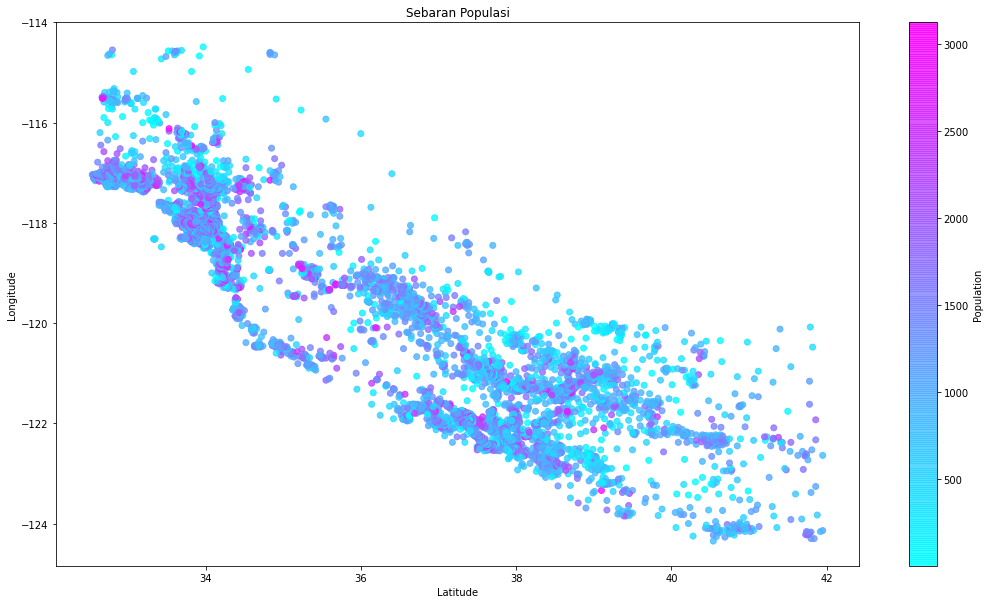

In [24]:
plt.figure(figsize=(18,10))
plt.scatter(data_rumah['latitude'],data_rumah['longitude'],c=data_rumah['population'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Population")
plt.title('Sebaran Populasi')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**2.5.3. Analisa korelasi fitur numerik**

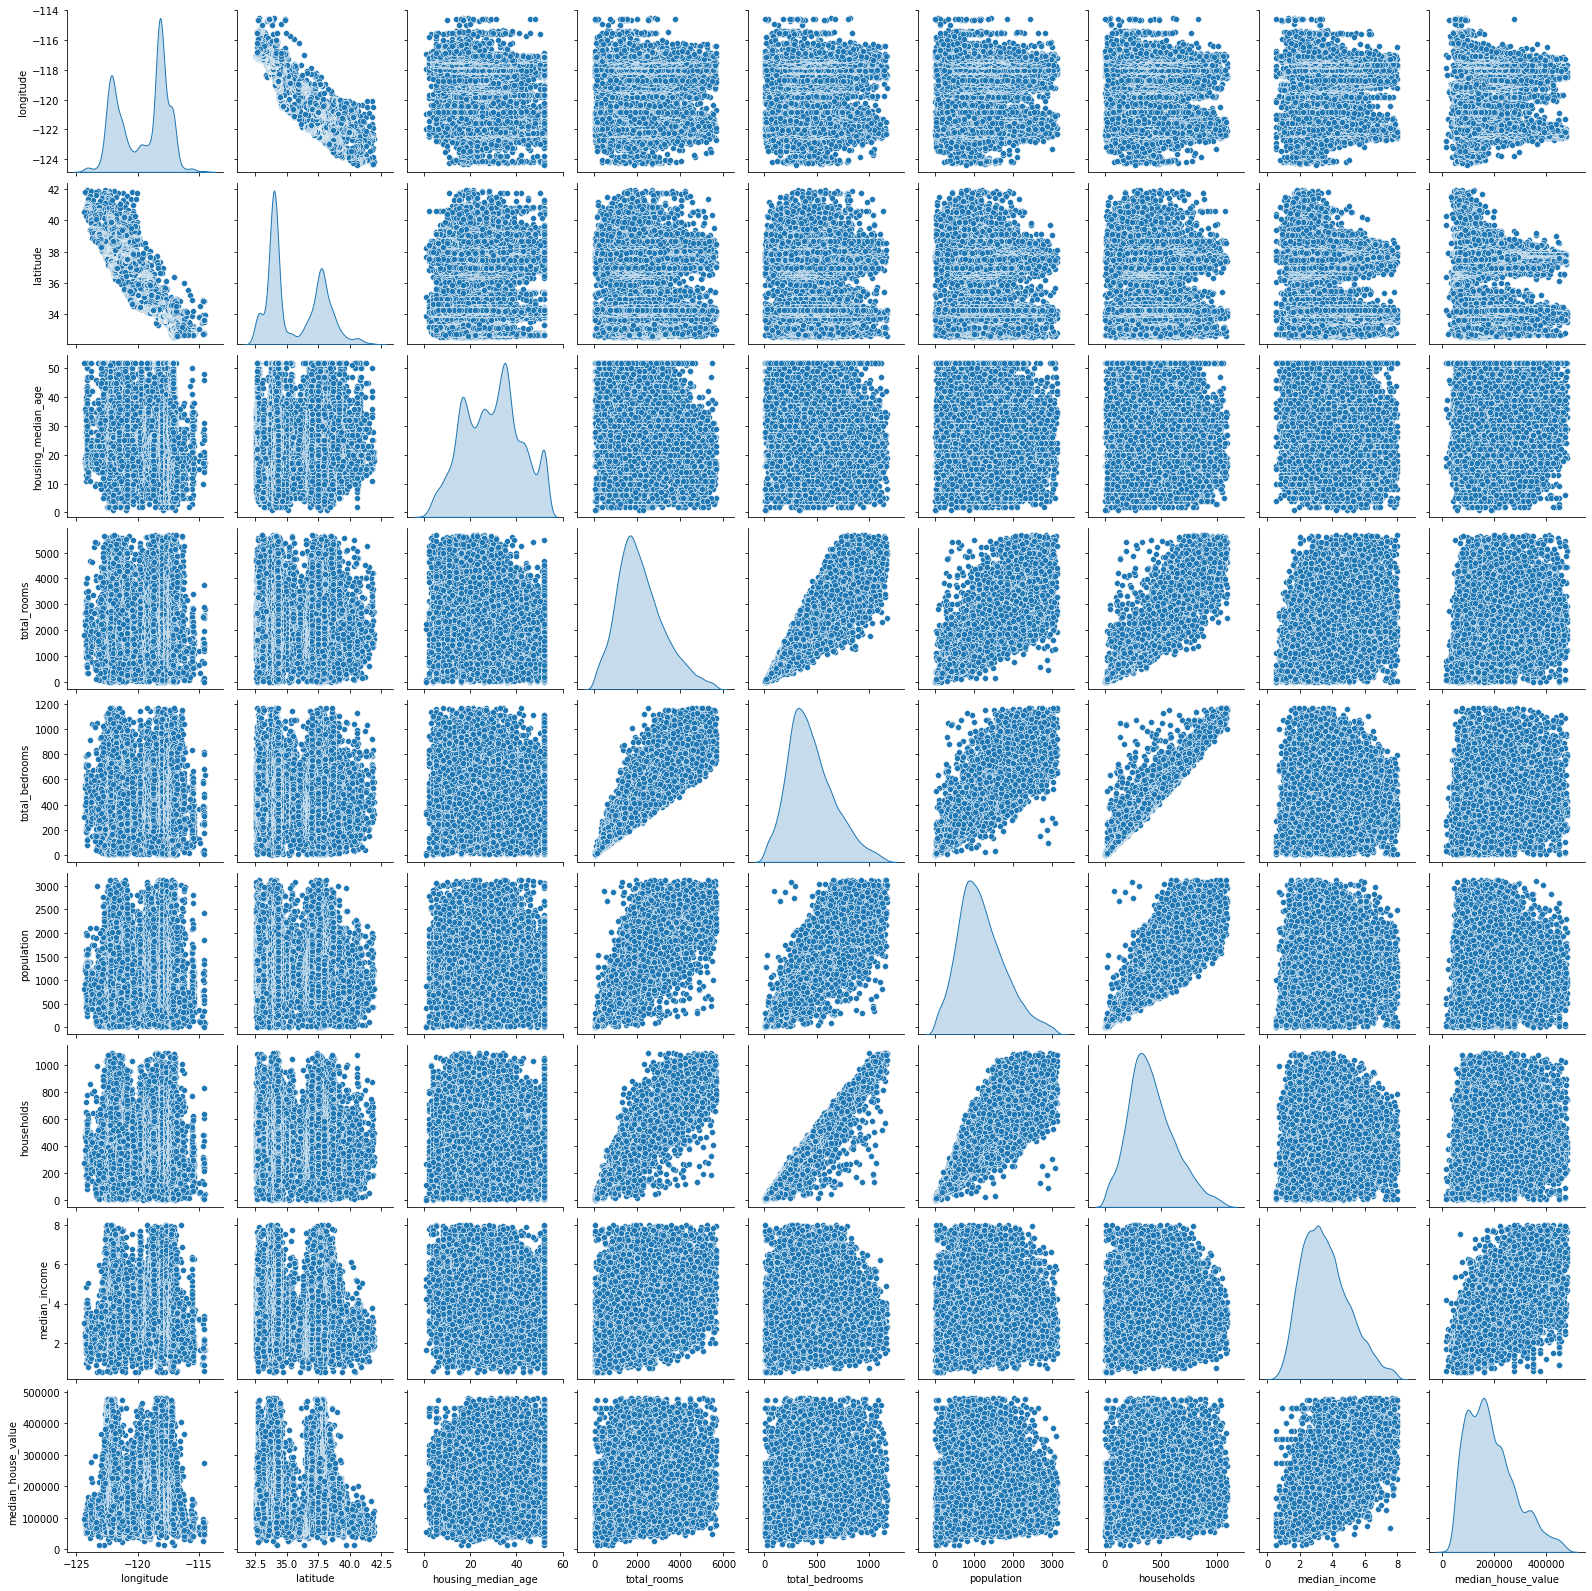

In [25]:
sns.pairplot(data_rumah, diag_kind = 'kde')

**2.5.4. Evaluasi skor korelasi fitur numerical**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

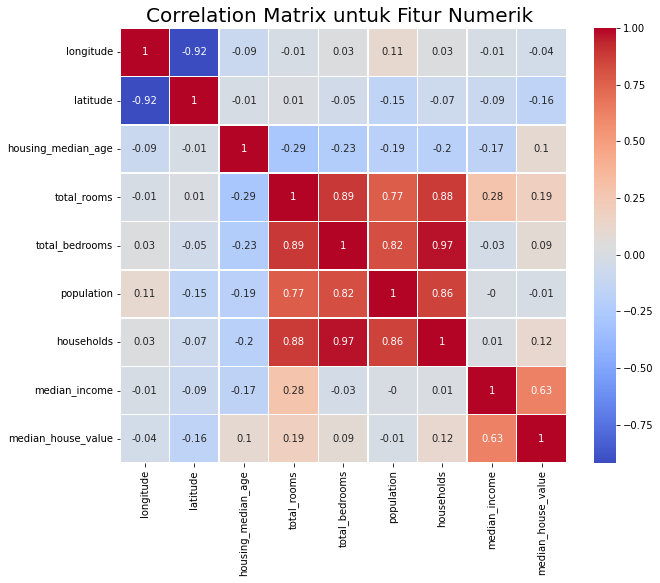

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_rumah.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## **3. Data Preparation**

Tahap ini merupakan tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

### **3.1. Encoding Fitur Kategori**

**Merubah Fitur Categorical menjadi Fitur Numerical dengan Teknik One-Hot-Encoding**

In [27]:
from sklearn.preprocessing import OneHotEncoder
data_rumah = pd.concat([data_rumah, pd.get_dummies(data_rumah['ocean_proximity'], prefix='ocean_proximity', drop_first=True)],axis=1)
data_rumah.drop(['ocean_proximity'], axis=1, inplace=True)
data_rumah.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,1,0


### **3.2. Reduksi Dimensi Dengan PCA**

**Memeriksa fitur yang memiliki korelasi paling tinggi**

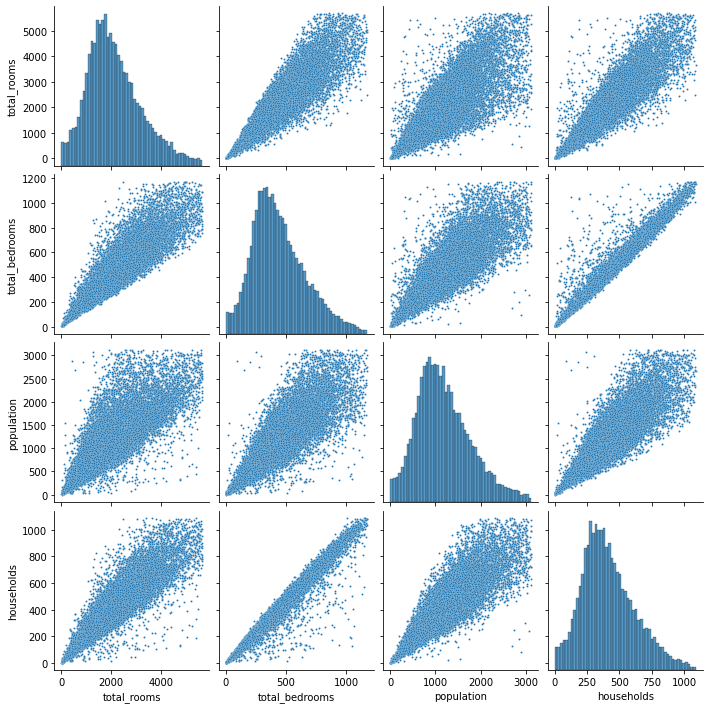

In [28]:
sns.pairplot(data_rumah[['total_rooms', 'total_bedrooms', 'population', 'households']], plot_kws={"s": 4});

**Mengaplikasikan Class PCA**

In [29]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=4, random_state=123)
pca.fit(data_rumah[['total_rooms', 'total_bedrooms', 'population', 'households']])
princ_comp = pca.transform(data_rumah[['total_rooms', 'total_bedrooms', 'population', 'households']])

In [30]:
pca.explained_variance_ratio_.round(3)

array([0.915, 0.077, 0.007, 0.001])

**Mereduksi Fitur**

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(data_rumah[['total_rooms', 'total_bedrooms', 'population', 'households']])
data_rumah['factor'] = pca.transform(data_rumah.loc[:, ('total_rooms', 'total_bedrooms', 'population', 'households')]).flatten()
data_rumah.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)

### **3.3. Membagi Dataset**

**Membagi dataset menjadi Data Training 80% dan Data Test 20%**

In [32]:
from sklearn.model_selection import train_test_split
 
X = data_rumah.drop(["median_house_value"],axis =1)
y = data_rumah["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [33]:
print(f'Jumlah dataset : {len(X)}')
print(f'Jumlah train dataset: {len(X_train)}')
print(f'Jumlah test dataset: {len(X_test)}')

Jumlah dataset : 17434
Jumlah train dataset: 13947
Jumlah test dataset: 3487


### **3.4. Standarisasi**

In [34]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'factor', 'median_income']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,longitude,latitude,housing_median_age,factor,median_income
4618,0.650672,-0.751374,0.533433,0.816621,-0.099702
16143,-1.426689,0.956288,1.840423,0.012485,0.412821
10609,0.904738,-0.931371,-1.345365,0.328675,2.528359
2665,2.035579,-1.189828,0.696807,-0.775763,-1.172426
16293,-0.808960,1.043979,0.615120,0.317467,-1.327189


In [35]:
#Mengecek nilai mean dan standar deviasi
X_train[numerical_features].describe().round(4)

,longitude,latitude,housing_median_age,factor,median_income
count,13947.0000,13947.0000,13947.0000,13947.0000,13947.0000
mean,0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.3632,-1.4529,-2.3256,-2.0585,-2.1297
25%,-1.0904,-0.8114,-0.8552,-0.7047,-0.7559
50%,0.5012,-0.6406,0.0433,-0.1369,-0.1344
75%,0.7852,0.9424,0.6968,0.5983,0.6342
max,2.5487,2.8855,1.8404,3.2624,3.0832


## **4. Model Development**

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma yaitu KNN, Random Forest dan Boosting Algorithm.

**Menyiapkan dataframe untuk analisis ke 3 model**

In [36]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### **4.1. K-Nearest Neighbor**

**Model Development dengan algoritma KNN**

In [37]:
from sklearn.neighbors import KNeighborsRegressor
 
model_knn = KNeighborsRegressor(n_neighbors=10)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_train)

### **4.2. Random Forest**

**Membuat Model Development dengan algoritma Random Forest**

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
model_RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=model_RF.predict(X_train), y_true=y_train)  

### **4.3. Boosting Algorithm**

**Model Development dengan Boosting Algorithm**

In [39]:
from sklearn.ensemble import AdaBoostRegressor
 
model_boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.001, random_state=55)                             
model_boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=model_boosting.predict(X_train), y_true=y_train)

## **4.4. Evaluation**

Tahap ini merupakan tahap dimana kita akan mengevaluasi model dan menentukan mana model yang paling baik. Metrik yang digunakan yaitu Mean Squared Error (MSE).

**Proses Scaling fitur numerik pada data training**

In [40]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


**Evaluasi model dengan metrik MSE**

In [41]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': model_knn, 'RF': model_RF, 'Boosting': model_boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,2.72609e+06,3.31934e+06
RF,444597,1.9394e+06
Boosting,4.20874e+06,4.09528e+06


**Visualisasi hasil evaluasi**

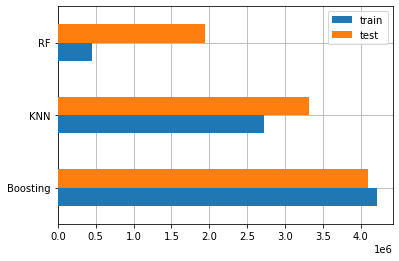

In [42]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Menguji Model dengan Melakukan Prediksi**

In [43]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2757,75500.0,64560.0,70411.6,81572.9


Berdasarkan hasil di atas, dapat disimpulkan bahwa algoritma Random Forest memiliki performa yang bagus dibandingkan algoritma KNN dan Boosting.

## Penutup

Model untuk memprediksi harga rumah telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi lagi seperti dengan mencoba penggunaan algoritma lainnya dalam membuat model seperti algoritma model deep learning.

***Referensi***

* https://scikit-learn.org/stable/
* https://pandas.pydata.org/docs/user_guide/index.html#user-guide  
*https://www.kaggle.com/arhitbosetagore/california-house-price-eda-and-linear-regression
*https://www.kaggle.com/thomaskonstantin/california-housing-analysis-and-prediction



**DATA DIRI**

Nama   : Mellania Permata Sylvie

Asal   : Sidoarjo, Jawa Timur

Status : Mahasiswa Sistem Informasi

Email  : mellasylvie1027@gmail.com